In [12]:
import pandas as pd
import numpy as np
import pylab as pl
import geopandas as gpd
import os
import scipy
from scipy.interpolate import griddata as gd
import statsmodels.formula.api as smf
import laspy
from sklearn import tree
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
path = os.getenv('PUIDATA')

In [14]:
oil_data = pd.read_csv(path+'/Oil_Boilers_-_Detailed_Fuel_Consumption_and_Building_Data.csv')

In [30]:
oil_data.head()

,"BBL (Borough, Block and Lot)",Postcode,Latitude,Longitude,Census Tract,BIN,Boiler_Capacity,Age range of boiler,Burner Model,Primary Fuel,Total Estimated Cosumption - High Estimate (Gallons),Needs to comply with Greener Greater Buildings Laws?,Building Type,Number of residential units,Num_Units
0,1007910062,NaN,NaN,NaN,NaN,NaN,2.80,31 to 35 years old,INDUSTRIAL COMBUSTION MEG-34S,#6,32016,NaN,Office Buildings,42,42
1,1012440072,NaN,NaN,NaN,NaN,NaN,14.00,26 to 30 years old,ICI DEG 175 P,#6,146000,Yes,Elevator Apartments,87,103
2,2025080024,NaN,NaN,NaN,NaN,NaN,2.80,Over 50 years,HEV-E-OIL AL4C,#4,30814,NaN,Elevator Apartments,30,33
3,2029900034,10460.0,40.835731,-73.886595,161.0,2010678.0,2.60,26 to 30 years old,HEV-E-OIL AMG 4 3/4,#4,25309,NaN,Loft Buildings,26,26
4,2024720028,NaN,NaN,NaN,NaN,NaN,2.59,21 to 26 years old,ICI - MMG 30,#4,25000,NaN,Elevator Apartments,36,37


In [31]:
oil_data.columns

Index(['BBL (Borough, Block and Lot)', 'Postcode', 'Latitude', 'Longitude',
       'Census Tract', 'BIN', 'Boiler_Capacity', 'Age range of boiler',
       'Burner Model', 'Primary Fuel',
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Needs to comply with Greener Greater Buildings Laws?', 'Building Type',
       'Number of residential units', 'Num_Units'],
      dtype='object')

In [32]:
oil_data = oil_data.drop([ 'Facility Address', 'Borough',
       'Community Board',
       'Council District','NTA',
       'Natural Gas Utility (Con Edison or National Grid', 'DEP Boiler Application #',
       'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)',
       'Boiler Model', 'Number of identical boilers','Boiler Installation Date',
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Deadline for complying with Audit and Retrocommissioning Law',
         'City Council District',
       'Total area of buildings on lot',
       'Number of buildings on property (tax lot)', 'Number of floors',
       'Year constructed', 'Condominium housing?', 'Cooperative housing?','Building Manager', 
                          'Owner', 'Owner Address'],axis=1)

ValueError: labels ['Facility Address' 'Borough' 'Community Board' 'Council District' 'NTA'
 'Natural Gas Utility (Con Edison or National Grid'
 'DEP Boiler Application #'
 'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)'
 'Boiler Model' 'Number of identical boilers' 'Boiler Installation Date'
 'Estimated retirement date of boiler (assuming 35 year average useful life)'
 'Is boiler dual fuel capable?'
 'Total Estimated Cosumption - Low Estimate (Gallons) '
 'Total Estimated Cosumption - High Estimate (MMBTUs) '
 'Total Estimated Cosumption - Low Estimate  (MMBTUs) '
 'Deadline for complying with Audit and Retrocommissioning Law'
 'City Council District' 'Total area of buildings on lot'
 'Number of buildings on property (tax lot)' 'Number of floors'
 'Year constructed' 'Condominium housing?' 'Cooperative housing?'
 'Building Manager' 'Owner' 'Owner Address'] not contained in axis

In [33]:
oil_data.head()

,"BBL (Borough, Block and Lot)",Postcode,Latitude,Longitude,Census Tract,BIN,Boiler_Capacity,Age range of boiler,Burner Model,Primary Fuel,Total Estimated Cosumption - High Estimate (Gallons),Needs to comply with Greener Greater Buildings Laws?,Building Type,Number of residential units,Num_Units
0,1007910062,NaN,NaN,NaN,NaN,NaN,2.80,31 to 35 years old,INDUSTRIAL COMBUSTION MEG-34S,#6,32016,NaN,Office Buildings,42,42
1,1012440072,NaN,NaN,NaN,NaN,NaN,14.00,26 to 30 years old,ICI DEG 175 P,#6,146000,Yes,Elevator Apartments,87,103
2,2025080024,NaN,NaN,NaN,NaN,NaN,2.80,Over 50 years,HEV-E-OIL AL4C,#4,30814,NaN,Elevator Apartments,30,33
3,2029900034,10460.0,40.835731,-73.886595,161.0,2010678.0,2.60,26 to 30 years old,HEV-E-OIL AMG 4 3/4,#4,25309,NaN,Loft Buildings,26,26
4,2024720028,NaN,NaN,NaN,NaN,NaN,2.59,21 to 26 years old,ICI - MMG 30,#4,25000,NaN,Elevator Apartments,36,37


In [34]:
oil_data = oil_data.rename(columns={"Total Estimated Cosumption - High Estimate (Gallons)":'Cosumption_Estimate',\
                                   'Boiler capacity (Gross BTU)':'Boiler_Capacity', 'Number of total units': 'Num_Units'})

In [35]:
oil_data.head()

,"BBL (Borough, Block and Lot)",Postcode,Latitude,Longitude,Census Tract,BIN,Boiler_Capacity,Age range of boiler,Burner Model,Primary Fuel,Total Estimated Cosumption - High Estimate (Gallons),Needs to comply with Greener Greater Buildings Laws?,Building Type,Number of residential units,Num_Units
0,1007910062,NaN,NaN,NaN,NaN,NaN,2.80,31 to 35 years old,INDUSTRIAL COMBUSTION MEG-34S,#6,32016,NaN,Office Buildings,42,42
1,1012440072,NaN,NaN,NaN,NaN,NaN,14.00,26 to 30 years old,ICI DEG 175 P,#6,146000,Yes,Elevator Apartments,87,103
2,2025080024,NaN,NaN,NaN,NaN,NaN,2.80,Over 50 years,HEV-E-OIL AL4C,#4,30814,NaN,Elevator Apartments,30,33
3,2029900034,10460.0,40.835731,-73.886595,161.0,2010678.0,2.60,26 to 30 years old,HEV-E-OIL AMG 4 3/4,#4,25309,NaN,Loft Buildings,26,26
4,2024720028,NaN,NaN,NaN,NaN,NaN,2.59,21 to 26 years old,ICI - MMG 30,#4,25000,NaN,Elevator Apartments,36,37


In [36]:
#oil_data[oil_data['Building Type'].any() in ('Office Buildings', 'Elevator Buildings', 'Walk-Up Apartments')]

In [37]:
bmark = pd.read_csv(path+'/nyc_benchmarking_disclosure_data_reported_in_2016.csv')

In [38]:
bmark.head()

,Unnamed: 0,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [39]:
bmark.columns

Index(['Unnamed: 0', 'Record Number', 'Order',
       'NYC Borough, Block and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kB

In [40]:
bmark = bmark.drop(['Unnamed: 0', 'Record Number', 'Order',
        'Co-reported BBL Status',
       'BBLs Co-reported',
        'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Borough',
       'DOF Benchmarking Submission Status',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
        'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
         'District Steam Use (kBtu)',
       'District Hot Water Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'DOF Property Floor Area (ft²)', 'Property GFA - Self-reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Release Date', 'DEP Provided Water Use (kgal)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method'],axis=1)

In [41]:
bmark.head()

,"NYC Borough, Block and Lot (BBL)",Reported NYC Building Identification Numbers (BINs),Zip Code,Primary Property Type - Self Selected,Site EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
0,1.003360e+09,1088884,10002.0,Multifamily Housing,73.7,Not Available,Not Available,Not Available,Not Available,Not Available,436.3,290.2,146.1
1,1.010618e+09,1026728,10019.0,Multifamily Housing,51.3,Not Available,Not Available,Not Available,Not Available,Not Available,201.4,76.4,125.0
2,1.014270e+09,1043974,10021.0,Multifamily Housing,44.9,Not Available,Not Available,Not Available,Not Available,Not Available,538.4,145.5,392.9
3,1.015180e+09,1048117,10128.0,Multifamily Housing,91.3,Not Available,Not Available,Not Available,Not Available,Not Available,699.3,304.6,394.7
4,1.003920e+09,1079685,10009.0,Residence Hall/Dormitory,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,0.0,0.0,0.0


In [42]:
oil_data.columns

Index(['BBL (Borough, Block and Lot)', 'Postcode', 'Latitude', 'Longitude',
       'Census Tract', 'BIN', 'Boiler_Capacity', 'Age range of boiler',
       'Burner Model', 'Primary Fuel',
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Needs to comply with Greener Greater Buildings Laws?', 'Building Type',
       'Number of residential units', 'Num_Units'],
      dtype='object')

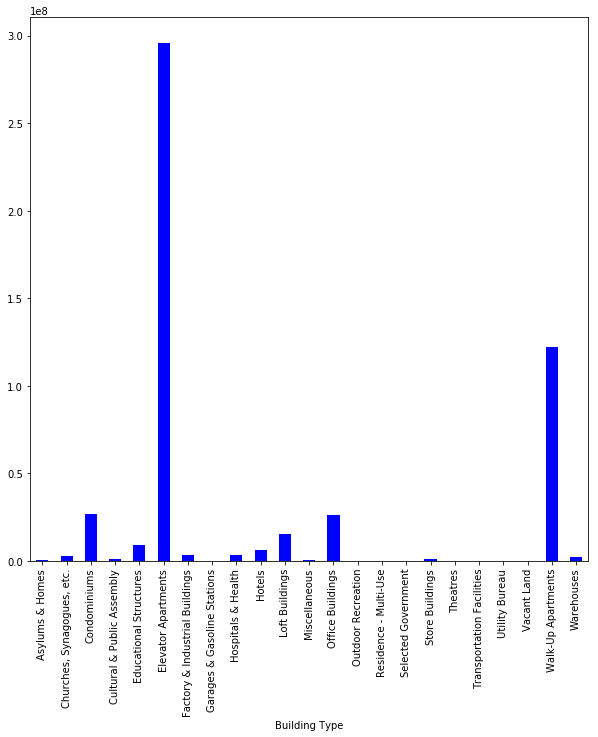

In [43]:
ax=pl.figure(figsize=(10,10))
ax1= ((oil_data['Total Estimated Cosumption - High Estimate (Gallons) '].groupby(oil_data['Building Type']).sum().plot(kind="bar",color='blue',label='Building_Type')))



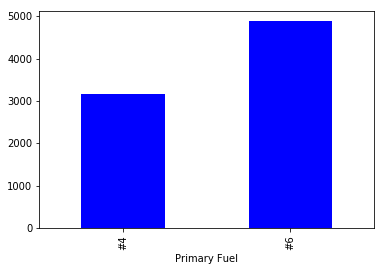

In [44]:
ax2= ((oil_data['Total Estimated Cosumption - High Estimate (Gallons) '].groupby(oil_data['Primary Fuel']).count().plot(kind="bar",color='blue',label='Primary_Fuel')))


In [45]:
oil_bmark = pd.merge(oil_data, bmark, left_on=oil_data['BBL (Borough, Block and Lot)'], right_on= bmark['NYC Borough, Block and Lot (BBL)'])

In [76]:
len(oil_bmark)

4989

In [20]:
oil_bmark.columns

Index(['BBL (Borough, Block and Lot)', 'Postcode', 'Latitude', 'Longitude',
       'Census Tract', 'BIN', 'Boiler capacity (Gross BTU)', 'Primary Fuel',
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Needs to comply with Greener Greater Buildings Laws?', 'Building Type',
       'Number of total units', 'NYC Borough, Block and Lot (BBL)',
       'Reported NYC Building Identification Numbers (BINs)', 'Zip Code',
       'Primary Property Type - Self Selected', 'Site EUI (kBtu/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)'],
      dtype='object')

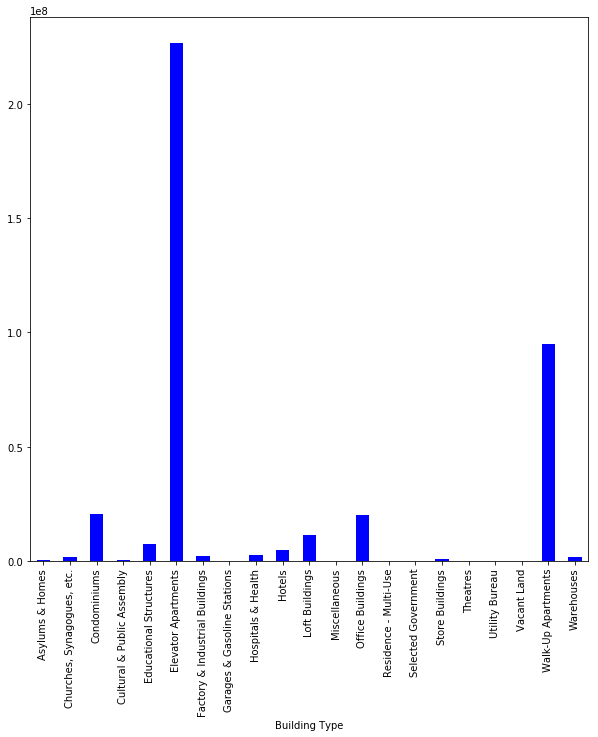

In [21]:
ax=pl.figure(figsize=(10,10))
ax1= ((oil_bmark['Total Estimated Cosumption - High Estimate (Gallons) '].groupby(oil_bmark['Building Type']).sum().plot(kind="bar",color='blue',label='Building_Type')))


In [28]:
ax2= ((oil_bmark['Total Estimated Cosumption - High Estimate (Gallons) '].groupby(oil_bmark['Primary Fuel']).count().plot(kind="bar",color='blue',label='Primary_Fuel')))


NameError: name 'oil_bmark' is not defined

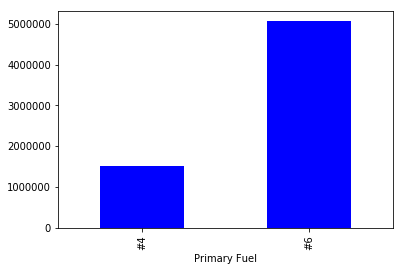

In [23]:
ax2= ((oil_bmark['Total GHG Emissions (Metric Tons CO2e)'].groupby(oil_bmark['Primary Fuel']).sum().plot(kind="bar",color='blue',label='Primary_Fuel')))


In [24]:
from sklearn import tree as tr

In [26]:
#tr.tree(oil_bmark['Total GHG Emissions (Metric Tons CO2e)'])

In [27]:
tr.DecisionTreeRegressor(oil_bmark['Total GHG Emissions (Metric Tons CO2e)'])

DecisionTreeRegressor(criterion=0         1393.5
1          872.2
2          318.2
3          456.5
4          987.7
5          599.2
6          684.9
7          712.7
8          783.7
9          780.7
10         663.3
11         561.2
12         288.5
13         743.6
14         567.2
15         407.0
16        2061.7
1...  NaN
4987         NaN
4988       777.4
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64,
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [28]:
new_df = pd.DataFrame()

In [30]:
data=(oil_bmark['Total Estimated Cosumption - High Estimate (Gallons) '],
                           oil_bmark['Primary Fuel'], oil_bmark['Direct GHG Emissions (Metric Tons CO2e)'])

In [31]:
new_df['Estimated_Consumption'] = oil_bmark['Total Estimated Cosumption - High Estimate (Gallons) ']


In [32]:
new_df['Primary_Fuel'] = oil_bmark['Primary Fuel']
new_df['GHG_Emission'] = oil_bmark['Direct GHG Emissions (Metric Tons CO2e)']
new_df.head()

,Estimated_Consumption,Primary_Fuel,GHG_Emission
0,146000,#6,1082.0
1,60773,#6,395.3
2,32000,#4,309.6
3,41063,#4,375.1
4,86000,#6,782.9


In [33]:
for i in range(len(new_df['Primary_Fuel'])):
    if new_df['Primary_Fuel'][i].startswith('#'):
        new_df['Primary_Fuel'][i] = new_df['Primary_Fuel'][i][1]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
new_df['Primary_Fuel'] = new_df['Primary_Fuel'].astype(int)

In [49]:
ols=smf.ols("new_df['GHG_Emission']~ new_df['Estimated_Consumption']", data=new_df).fit()

ols_fit=ols.fit()

In [50]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     new_df['GHG_Emission']   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     4.655
Date:                    Mon, 11 Dec 2017   Prob (F-statistic):             0.0310
Time:                            22:47:12   Log-Likelihood:                -50543.
No. Observations:                    4763   AIC:                         1.011e+05
Df Residuals:                        4761   BIC:                         1.011e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                         487.4713    198.683      2.454      0.014        97.962   876.981
new_df['Estimated_Consumption']     0.0038      0.002      2.158      0.031         0.000     0.007
==============================================================================
Omnibus:                    16503.256   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3788017012.165
Skew:                          64.944   Prob(JB):                         0.00
Kurtosis:                    4369.961   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
new_df.corr()

,Estimated_Consumption,Primary_Fuel,GHG_Emission
Estimated_Consumption,1.000000,0.149438,0.031254
Primary_Fuel,0.149438,1.000000,0.015815
GHG_Emission,0.031254,0.015815,1.000000


In [38]:
new_df.head()

,Estimated_Consumption,Primary_Fuel,GHG_Emission
0,146000,6,1082.0
1,60773,6,395.3
2,32000,4,309.6
3,41063,4,375.1
4,86000,6,782.9


## Random Analysis

In [39]:
bmark.head()

,"NYC Borough, Block and Lot (BBL)",Reported NYC Building Identification Numbers (BINs),Zip Code,Primary Property Type - Self Selected,Site EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
0,1.003360e+09,1088884,10002.0,Multifamily Housing,73.7,Not Available,Not Available,Not Available,Not Available,Not Available,436.3,290.2,146.1
1,1.010618e+09,1026728,10019.0,Multifamily Housing,51.3,Not Available,Not Available,Not Available,Not Available,Not Available,201.4,76.4,125.0
2,1.014270e+09,1043974,10021.0,Multifamily Housing,44.9,Not Available,Not Available,Not Available,Not Available,Not Available,538.4,145.5,392.9
3,1.015180e+09,1048117,10128.0,Multifamily Housing,91.3,Not Available,Not Available,Not Available,Not Available,Not Available,699.3,304.6,394.7
4,1.003920e+09,1079685,10009.0,Residence Hall/Dormitory,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,0.0,0.0,0.0


In [42]:
bmark[bmark['Fuel Oil #1 Use (kBtu)'] != 'Not Available']

,Unnamed: 0,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
330,330,NaN,331,1.002580e+09,Secondary,1002560001;1002580001;1002560014,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,331,NaN,332,1.002560e+09,Secondary,1002560001;1002580001;1002560014,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,335,NaN,336,1.002600e+09,Secondary,1002600001;1002600075;1002670024;1002630001,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,336,NaN,337,1.002670e+09,Secondary,1002600001;1002600075;1002670024;1002630001,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,337,NaN,338,1.002630e+09,Secondary,1002600001;1002600075;1002670024;1002630001,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,370,NaN,371,1.003510e+09,Secondary,1003470080;1003510001,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,372,NaN,373,1.003670e+09,Secondary,1003620010;1003670001;1003620001;1003560001;10...,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,373,NaN,374,1.003620e+09,Secondary,1003620010;1003670001;1003620001;1003560001;10...,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,374,NaN,375,1.003560e+09,Secondary,1003620010;1003670001;1003620001;1003560001;10...,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,375,NaN,376,1.003230e+09,Secondary,1003620010;1003670001;1003620001;1003560001;10...,See Primary BBL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
SQL_SOURCE = 'https://gauravbhardwaj.carto.com/api/v2/sql?q='
try:
    # Python 3 packages
    from urllib.parse import urlparse, urlencode
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    # Python 2 packages
    from urlparse import urlparse
    from urllib import urlencode
    from urllib2 import urlopen, Request, HTTPError
    
# works for both python 2 and 3
from io import StringIO
import ast
import pandas as pd

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    # added .encode('utf-8') to prevent errors in python 3
    data = urlencode({'format': format, 'q': query}).encode('utf-8')
    try:
        response = urlopen(source, data)
    # changed syntax to use 'as' keyword
    except HTTPError as e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return pd.read_csv(response)

In [46]:
test= '''
SELECT count(*) FROM oil_boilers where boiler_installation_date < 2000
'''
queryCartoDB(test)

,count,Unnamed: 1
0,6608,NaN


#### 6608 buildings use boilers installed before 2000.

In [97]:
oil_bmark.head()

,"BBL (Borough, Block and Lot)",Postcode,Latitude,Longitude,Census Tract,BIN,Boiler_Capacity,Primary Fuel,Total Estimated Cosumption - High Estimate (Gallons),Needs to comply with Greener Greater Buildings Laws?,...,Site EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),log_ghg
0,1012440072,NaN,NaN,NaN,NaN,NaN,14.0,#6,146000,Yes,...,76.1,Not Available,Not Available,14013371.4,Not Available,Not Available,1393.5,1082.0,311.5,3.144107
1,1007620050,NaN,NaN,NaN,NaN,NaN,8.4,#6,60773,Yes,...,72.1,Not Available,4830482.9,Not Available,Not Available,Not Available,872.2,395.3,476.8,2.940616
2,4030790076,11374.0,40.730663,-73.866590,687.0,4072062.0,4.2,#4,32000,Yes,...,105.6,Not Available,Not Available,910769.1,Not Available,Not Available,318.2,309.6,8.6,2.502700
3,1019930023,10027.0,40.812961,-73.960287,211.0,1059839.0,4.1,#4,41063,Yes,...,99.6,Not Available,Not Available,4811578.7,Not Available,Not Available,456.5,375.1,81.4,2.659441
4,4014970023,11373.0,40.744299,-73.887227,267.0,4037029.0,10.4,#6,86000,Yes,...,107.4,Not Available,3041520,Not Available,Not Available,Not Available,987.7,782.9,204.8,2.994625


In [141]:
oil_bmarkt['log_ghg'] = np.log10(oil_bmarkt['Total GHG Emissions (Metric Tons CO2e)'])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
oil_bmark = oil_bmark.dropna(subset=['log_ghg'])

In [92]:
oil_bmark.columns

Index(['BBL (Borough, Block and Lot)', 'Postcode', 'Latitude', 'Longitude',
       'Census Tract', 'BIN', 'Boiler_Capacity', 'Primary Fuel',
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Needs to comply with Greener Greater Buildings Laws?', 'Building Type',
       'Num_Units', 'NYC Borough, Block and Lot (BBL)',
       'Reported NYC Building Identification Numbers (BINs)', 'Zip Code',
       'Primary Property Type - Self Selected', 'Site EUI (kBtu/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)', 'log_ghg'],
      dtype='object')

In [154]:
lm1 = smf.ols(formula="oil_bmarkt['log_ghg'] ~ oil_bmarkt['log_estimate']", data= oil_bmarkt).fit()

In [155]:
lm1.params

Intercept                     0.342165
oil_bmarkt['log_estimate']    0.511546
dtype: float64

In [152]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     oil_bmarkt['log_ghg']   R-squared:                       0.178
Model:                               OLS   Adj. R-squared:                  0.178
Method:                    Least Squares   F-statistic:                     1017.
Date:                   Mon, 11 Dec 2017   Prob (F-statistic):          3.79e-202
Time:                           23:28:07   Log-Likelihood:                -1270.3
No. Observations:                   4694   AIC:                             2545.
Df Residuals:                       4692   BIC:                             2557.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.3422      0.077      4.436      0.000         0.191     0.493
oil_bmarkt['log_estimate']     0.5115      0.016     31.889      0.000         0.480     0.543
==============================================================================
Omnibus:                      656.351   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6379.041
Skew:                          -0.333   Prob(JB):                         0.00
Kurtosis:                       8.672   Cond. No.                         83.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
oil['Total GHG Emissions (Metric Tons CO2e)'].describe()

count      4766.000000
mean       1382.686215
std       14037.560219
min           0.000000
25%         398.000000
50%         577.350000
75%         941.475000
max      664407.100000
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

In [119]:
tholdp = np.mean(oil['Total GHG Emissions (Metric Tons CO2e)']) +\
(3 * np.std(oil['Total GHG Emissions (Metric Tons CO2e)']))

tholdp

43490.948609038904

In [120]:
oil_bmark['thold'] = tholdp

In [123]:
oil_bmarkt= oil_bmark[oil_bmark['Total GHG Emissions (Metric Tons CO2e)'] < tholdp]

In [143]:
oil_bmarkt= oil_bmarkt[oil_bmarkt['log_ghg'] >0 ]

In [144]:
oil_bmarkt.log_ghg.describe()

count    4739.000000
mean        2.797566
std         0.351319
min         0.079181
25%         2.602386
50%         2.762153
75%         2.973382
max         4.489719
Name: log_ghg, dtype: float64

In [127]:
oil_bmarkt['Total GHG Emissions (Metric Tons CO2e)'].describe()

count     4757.000000
mean       907.718730
std       1392.683763
min          0.000000
25%        397.400000
50%        576.500000
75%        939.000000
max      30883.000000
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

In [128]:
oil_bmark['Total GHG Emissions (Metric Tons CO2e)'].describe()

count      4766.000000
mean       1382.686215
std       14037.560219
min           0.000000
25%         398.000000
50%         577.350000
75%         941.475000
max      664407.100000
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

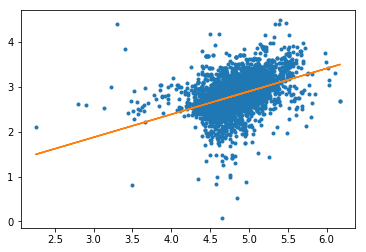

In [156]:
pl.plot(oil_bmarkt['log_estimate'],oil_bmarkt['log_ghg'],'.')
pl.plot(oil_bmarkt['log_estimate'], lm1.predict(),'-')

In [148]:
oil_bmarkt['log_estimate'] = np.log10(oil_bmarkt['Total Estimated Cosumption - High Estimate (Gallons) '])

In [150]:
oil_bmarkt= oil_bmarkt[oil_bmarkt['log_estimate'] >0 ]
oil_bmarkt.log_estimate.describe()

count    4694.000000
mean        4.799207
std         0.288674
min         2.255273
25%         4.623249
50%         4.759879
75%         4.952700
max         6.175816
Name: log_estimate, dtype: float64

In [158]:
oil_bmarkt.corr()

,"BBL (Borough, Block and Lot)",Postcode,Latitude,Longitude,Census Tract,BIN,Boiler_Capacity,Total Estimated Cosumption - High Estimate (Gallons),Num_Units,"NYC Borough, Block and Lot (BBL)",Zip Code,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),log_ghg,thold,log_estimate
"BBL (Borough, Block and Lot)",1.000000e+00,9.709029e-01,-3.643581e-01,6.616432e-01,4.093682e-01,9.968006e-01,3.197160e-03,-1.013826e-01,1.540914e-01,1.000000e+00,9.768999e-01,4.951198e-02,-3.525367e-02,2.522825e-02,-1.039902e-01,-7.744112e-02,4.681975e-15,-1.194363e-01
Postcode,9.709029e-01,1.000000e+00,-4.216337e-01,6.475508e-01,4.111092e-01,9.704324e-01,-1.377987e-02,-1.189611e-01,1.691822e-01,9.709029e-01,9.998413e-01,1.440996e-02,-5.966631e-02,9.596157e-03,-1.229993e-01,-1.080477e-01,8.980580e-16,-1.302928e-01
Latitude,-3.643581e-01,-4.216337e-01,1.000000e+00,2.303191e-01,-1.308437e-01,-3.764772e-01,2.531920e-02,-8.194398e-02,-9.998710e-02,-3.643581e-01,-4.209417e-01,8.925779e-02,-1.058305e-01,-3.515187e-02,-1.523728e-01,-1.065459e-01,-3.069877e-13,-6.619942e-02
Longitude,6.616432e-01,6.475508e-01,2.303191e-01,1.000000e+00,4.852374e-01,6.754734e-01,-1.149695e-02,-1.588510e-01,1.969263e-01,6.616432e-01,6.482869e-01,7.858734e-02,-8.709311e-02,1.238159e-02,-1.772876e-01,-6.610736e-02,-7.967621e-13,-1.532653e-01
Census Tract,4.093682e-01,4.111092e-01,-1.308437e-01,4.852374e-01,1.000000e+00,4.330632e-01,-1.393977e-02,-6.206460e-02,2.675901e-01,4.093682e-01,4.115077e-01,8.907746e-04,2.144469e-02,4.275462e-02,-1.380119e-02,8.232066e-02,-5.980271e-16,-5.568813e-02
BIN,9.968006e-01,9.704324e-01,-3.764772e-01,6.754734e-01,4.330632e-01,1.000000e+00,-1.314011e-02,-1.188849e-01,2.061294e-01,9.968006e-01,9.705104e-01,2.660528e-02,-4.198910e-02,2.793276e-02,-1.131882e-01,-7.393185e-02,3.140939e-15,-1.300398e-01
Boiler_Capacity,3.197160e-03,-1.377987e-02,2.531920e-02,-1.149695e-02,-1.393977e-02,-1.314011e-02,1.000000e+00,-5.406348e-03,-2.712075e-03,3.197160e-03,2.763735e-03,1.186974e-02,8.084537e-04,3.622604e-03,-3.247012e-03,8.034210e-03,1.735731e-16,-4.886308e-03
Total Estimated Cosumption - High Estimate (Gallons),-1.013826e-01,-1.189611e-01,-8.194398e-02,-1.588510e-01,-6.206460e-02,-1.188849e-01,-5.406348e-03,1.000000e+00,3.978218e-01,-1.013826e-01,-9.500907e-02,1.062080e-02,3.152269e-01,2.755312e-01,2.573607e-01,3.630090e-01,-6.467090e-16,7.897989e-01
Num_Units,1.540914e-01,1.691822e-01,-9.998710e-02,1.969263e-01,2.675901e-01,2.061294e-01,-2.712075e-03,3.978218e-01,1.000000e+00,1.540914e-01,1.501398e-01,3.459655e-02,4.993421e-01,5.753847e-01,2.216439e-01,4.779796e-01,8.624209e-17,3.251319e-01
"NYC Borough, Block and Lot (BBL)",1.000000e+00,9.709029e-01,-3.643581e-01,6.616432e-01,4.093682e-01,9.968006e-01,3.197160e-03,-1.013826e-01,1.540914e-01,1.000000e+00,9.768999e-01,4.951198e-02,-3.525367e-02,2.522825e-02,-1.039902e-01,-7.744112e-02,4.681975e-15,-1.194363e-01


In [10]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyha_17d.zip

--2017-12-14 12:39:40--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyha_17d.zip
Resolving www1.nyc.gov... 104.106.240.221, 2600:141b:13:292::1500, 2600:141b:13:297::1500
Connecting to www1.nyc.gov|104.106.240.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 964621 (942K) [application/zip]
Saving to: “nyha_17d.zip”

100%[======================================>] 964,621     2.05M/s   in 0.4s    

2017-12-14 12:39:40 (2.05 MB/s) - “nyha_17d.zip” saved [964621/964621]



In [11]:
!unzip nyha_17d.zip -d $PUIDATA

Archive:  nyha_17d.zip
  inflating: /home/cusp/gb1877/PUIdata/nyha_17d/nyha.shp  
  inflating: /home/cusp/gb1877/PUIdata/nyha_17d/nyha.dbf  
  inflating: /home/cusp/gb1877/PUIdata/nyha_17d/nyha.shx  
  inflating: /home/cusp/gb1877/PUIdata/nyha_17d/nyha.prj  
  inflating: /home/cusp/gb1877/PUIdata/nyha_17d/nyha.shp.xml  
